In [1]:
import sqlite3

conn = sqlite3.connect('database.db')
c = conn.cursor()

def create_tables():
    c.execute('''
    CREATE TABLE IF NOT EXISTS Usuarios (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        username TEXT NOT NULL UNIQUE,
        password TEXT NOT NULL
    )
    ''')
    c.execute('''
    CREATE TABLE IF NOT EXISTS Backlog (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        user_id INTEGER,
        transaction_date DATE,
        description TEXT,
        amount REAL,
        category TEXT,
        FOREIGN KEY(user_id) REFERENCES Usuarios(id)
    )
    ''')
    conn.commit()

create_tables()

In [1]:
import sqlite3

# Criar conexão com o banco de dados
conn = sqlite3.connect('database.db')
c = conn.cursor()

# Verificar campos da tabela Usuarios
c.execute("PRAGMA table_info(Usuarios)")
print("Campos da tabela Usuarios:")
for row in c.fetchall():
    print(f"  {row[1]} ({row[2]})")

# Verificar registros da tabela Usuarios
c.execute("SELECT * FROM Usuarios")
print("\nRegistros da tabela Usuarios:")
for row in c.fetchall():
    print(f"  {row}")

# Verificar campos da tabela Jogos
c.execute("PRAGMA table_info(Backlog)")
print("\nCampos da tabela Backlog:")
for row in c.fetchall():
    print(f"  {row[1]} ({row[2]})")

# Verificar registros da tabela Jogos
c.execute("SELECT * FROM Backlog")
print("\nRegistros da tabela Backlog:")
for row in c.fetchall():
    print(f"  {row}")

# Fechar a conexão
conn.close()

Campos da tabela Usuarios:
  id (INTEGER)
  username (TEXT)
  password (TEXT)

Registros da tabela Usuarios:
  (1, 'danilo@gmail.com', '12345678')

Campos da tabela Backlog:
  id (INTEGER)
  user_id (INTEGER)
  transaction_date (DATE)
  description (TEXT)
  amount (REAL)
  category (TEXT)

Registros da tabela Backlog:


,Data da Transação,Transação,Tipo Transação,Identificação,Valor (R$),Entrada,Saída,Mês,Saldo
0,31/01/2024,Transf Pix recebida,CRÉDITO,JESSICA BOMFIM OLIVEIRA,5.00,5.0,0.00,Janeiro,5.00
1,31/01/2024,Transf Pix recebida,CRÉDITO,ADEILTON PRAZERES BARBOSA,100.00,100.0,0.00,Janeiro,100.00
2,31/01/2024,Transf Pix recebida,CRÉDITO,Elias dos Santos santana,100.00,100.0,0.00,Janeiro,100.00
3,31/01/2024,Transf Pix recebida,CRÉDITO,MARIO HENRIQUE FERREIRA MIRANDA,160.00,160.0,0.00,Janeiro,160.00
4,31/01/2024,Transf Pix recebida,CRÉDITO,GEORGE CLEBER MORAES LIMA,100.00,100.0,0.00,Janeiro,100.00
...,...,...,...,...,...,...,...,...,...
185,03/01/2024,Transf Pix recebida,CRÉDITO,Leonardo Andrade de Menezes,13.00,13.0,0.00,Janeiro,13.00
186,02/01/2024,Transf Pix recebida,CRÉDITO,LEANDRO SANTOS DA HORA,145.20,145.2,0.00,Janeiro,145.20
187,02/01/2024,Transf Pix recebida,CRÉDITO,LUIZ FERNANDO DE SOUSA OLIVEIRA,170.00,170.0,0.00,Janeiro,170.00
188,02/01/2024,Transf Pix recebida,CRÉDITO,Jose Carlos Sacramento Silva,10.00,10.0,0.00,Janeiro,10.00


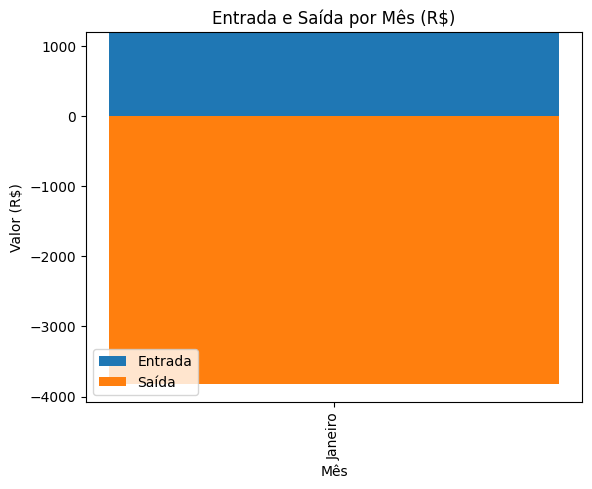

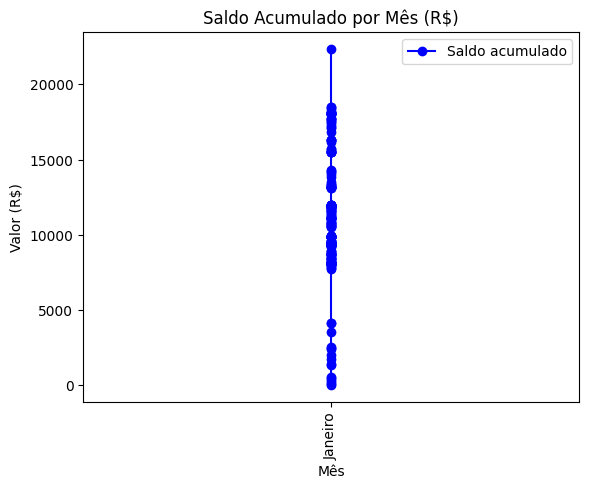

In [7]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

extrato_folder_path = '/workspaces/dksge/Extratos'

file_path = os.path.join(extrato_folder_path, "igreja-evangelica-geracao-santa_01012024_a_31012024_3a391663.csv")


# Ler arquivo CSV da pasta 'Extratos' e exibir os dados
df_upload = pd.read_csv(file_path)

# Processamento dos dados conforme instruções fornecidas
df_upload['Tipo Transação'] = df_upload['Tipo Transação'].str.upper()
df_upload['Entrada'] = df_upload.apply(lambda x: x['Valor'] if x['Tipo Transação'] == 'CRÉDITO' else 0, axis=1)
df_upload['Saída'] = df_upload.apply(lambda x: x['Valor'] if x['Tipo Transação'] == 'DÉBITO' else 0, axis=1)

# Mapeamento de número do mês para nome em português
meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

# Extrair o mês da coluna 'Data' e mapear para o nome em português
df_upload['Mês'] = pd.to_datetime(df_upload['Data'], format='%d/%m/%Y').dt.month.map(meses)

# Calcular saldo com base nos dados do upload
df_upload['Saldo'] = df_upload['Entrada'] - df_upload['Saída']

# Calcular valores de Entrada, Saída e Saldo
Valor_Entrada = df_upload['Entrada'].sum()
Valor_Saída = df_upload['Saída'].sum()
Saldo = Valor_Entrada - Valor_Saída

# Renomear colunas conforme dados fornecidos
df_upload.rename(columns={'Valor': 'Valor (R$)', 'Tipo': 'Tipo de Transação', 'Data': 'Data da Transação'}, inplace=True)

# Gráfico de barras para Entrada e Saída por mês
fig, ax = plt.subplots()
ax.bar(df_upload['Mês'], df_upload['Entrada'], label='Entrada')
ax.bar(df_upload['Mês'], df_upload['Saída'], label='Saída', bottom=df_upload['Entrada'])
ax.set_ylabel('Valor (R$)')
ax.set_xlabel('Mês')
ax.set_title('Entrada e Saída por Mês (R$)')
plt.xticks(rotation=90)
plt.legend()


# Gráfico de linha para Saldo acumulado por mês
fig, ax = plt.subplots()
ax.plot(df_upload['Mês'], df_upload['Saldo'].cumsum(), marker='o', linestyle='-', color='b', label='Saldo acumulado')
ax.set_ylabel('Valor (R$)')
ax.set_xlabel('Mês')
ax.set_title('Saldo Acumulado por Mês (R$)')
plt.xticks(rotation=90)
plt.legend()


display(df_upload)